In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import os

In [2]:
def load_json(src_path):
    with open(src_path, 'r') as src_file:
        output = json.load(src_file)
    return output

In [6]:
activations_path = 'data/activations/output_20.json'
num_components = 16384

In [8]:
activations_dict = load_json(activations_path)

In [9]:
def vectorize_activations(activations):
    activations_vector = np.zeros(num_components)
    for idx, act in activations.items():
        activations_vector[int(idx)] = act
    return activations_vector

In [30]:
def aggregate_sentence_activations(sentence_activations, method):
    if method == 'or':
        return np.column_stack(sentence_activations).any(axis=1).astype(int)
    elif method == 'eos':
        return [1 if el != 0 else 0 for el in sentence_activations[-1] ]
    else:
        raise Exception(f'Aggregation method {method} not implemented yet.')

In [31]:
def load_activations(activations_dict, aggregation_mehtod='or'):
    activations = {'yes':[], 'no':[]}
    for sentence_dict in activations_dict.values():
        sentence_activations_dict = sentence_dict['step_by_step_non_zero_activations']
        sentence_activations = []
        for token_activations in sentence_activations_dict:
            sentence_activations.append(vectorize_activations(token_activations))
        sentence_activations = aggregate_sentence_activations(sentence_activations, aggregation_mehtod)
        sentence_label = sentence_dict['truth_label']
        activations[sentence_label].append(sentence_activations)
    return activations

In [32]:
activations = load_activations(activations_dict, aggregation_mehtod='eos')

In [33]:
yes_activations = np.sum(activations['yes'], axis=0)/len(activations['yes'])
no_activations = np.sum(activations['no'], axis=0)/len(activations['no'])

In [36]:
for idx, el in enumerate(yes_activations):
    if el > 0.8:
        print(idx)

9768


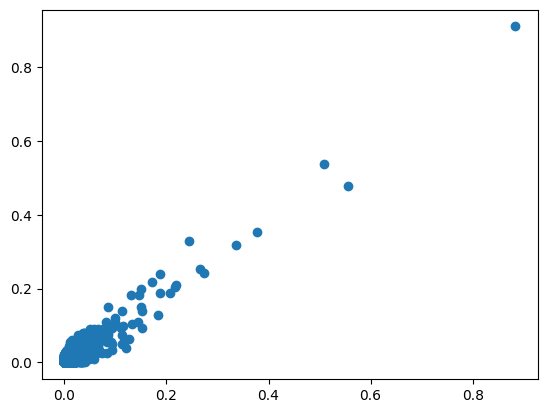

In [34]:
plt.scatter(list(yes_activations), list(no_activations))